In [4]:
if (!require(tidyverse)) {
  install.packages("tidyverse")
  library(tidyverse)
}
if (!require(janitor)) {
  install.packages("janitor")
  library(janitor)
}

# Load the diamonds dataset from ggplot2
data("diamonds")

# 1. Cleaning Data

In [5]:

# View the first few rows of the dataset
head(diamonds)

# Get summary statistics of the dataset
summary(diamonds)

# Remove any duplicate rows (though `diamonds` doesn't contain duplicates by default)
diamonds_clean <- diamonds %>%
  distinct()
# Clean column names (making them consistent and readable, though `diamonds` has already clean names)
diamonds_clean <- diamonds_clean %>%
  clean_names()

# Check for missing values (though `diamonds` doesn't have missing values)
diamonds_clean %>%
  summarise_all(~sum(is.na(.)))
#Remove rows with missing values (not necessary here)
diamonds_clean <- diamonds_clean %>%
  drop_na()

#Replace missing values with the median (if needed)
diamonds_clean <- diamonds_clean %>%
  mutate(across(where(is.numeric), ~replace_na(., median(., na.rm = TRUE))))


carat cut       color clarity depth table price x    y    z   
1 0.23  Ideal     E     SI2     61.5  55    326   3.95 3.98 2.43
2 0.21  Premium   E     SI1     59.8  61    326   3.89 3.84 2.31
3 0.23  Good      E     VS1     56.9  65    327   4.05 4.07 2.31
4 0.29  Premium   I     VS2     62.4  58    334   4.20 4.23 2.63
5 0.31  Good      J     SI2     63.3  58    335   4.34 4.35 2.75
6 0.24  Very Good J     VVS2    62.8  57    336   3.94 3.96 2.48

     carat               cut        color        clarity          depth      
 Min.   :0.2000   Fair     : 1610   D: 6775   SI1    :13065   Min.   :43.00  
 1st Qu.:0.4000   Good     : 4906   E: 9797   VS2    :12258   1st Qu.:61.00  
 Median :0.7000   Very Good:12082   F: 9542   SI2    : 9194   Median :61.80  
 Mean   :0.7979   Premium  :13791   G:11292   VS1    : 8171   Mean   :61.75  
 3rd Qu.:1.0400   Ideal    :21551   H: 8304   VVS2   : 5066   3rd Qu.:62.50  
 Max.   :5.0100                     I: 5422   VVS1   : 3655   Max.   :79.00  
                                    J: 2808   (Other): 2531                  
     table           price             x                y         
 Min.   :43.00   Min.   :  326   Min.   : 0.000   Min.   : 0.000  
 1st Qu.:56.00   1st Qu.:  950   1st Qu.: 4.710   1st Qu.: 4.720  
 Median :57.00   Median : 2401   Median : 5.700   Median : 5.710  
 Mean   :57.46   Mean   : 3933   Mean   : 5.731   Mean   : 5.735  
 3rd Qu.:59.00   3rd Qu.: 5324   3rd Qu.:

carat cut color clarity depth table price x y z
1 0     0   0     0       0     0     0     0 0 0

# 2. Data Manipulation


In [6]:

# Filter the dataset for diamonds priced above $5000
diamonds_filtered <- diamonds_clean %>%
  filter(price > 5000)

# Group the data by cut and calculate summary statistics (e.g., average price per cut)
diamonds_summary <- diamonds_clean %>%
  group_by(cut) %>%
  summarise(average_price = mean(price, na.rm = TRUE),
            total_carat = sum(carat, na.rm = TRUE))

# 3. Data Visualization


`geom_smooth()` using formula = 'y ~ x'


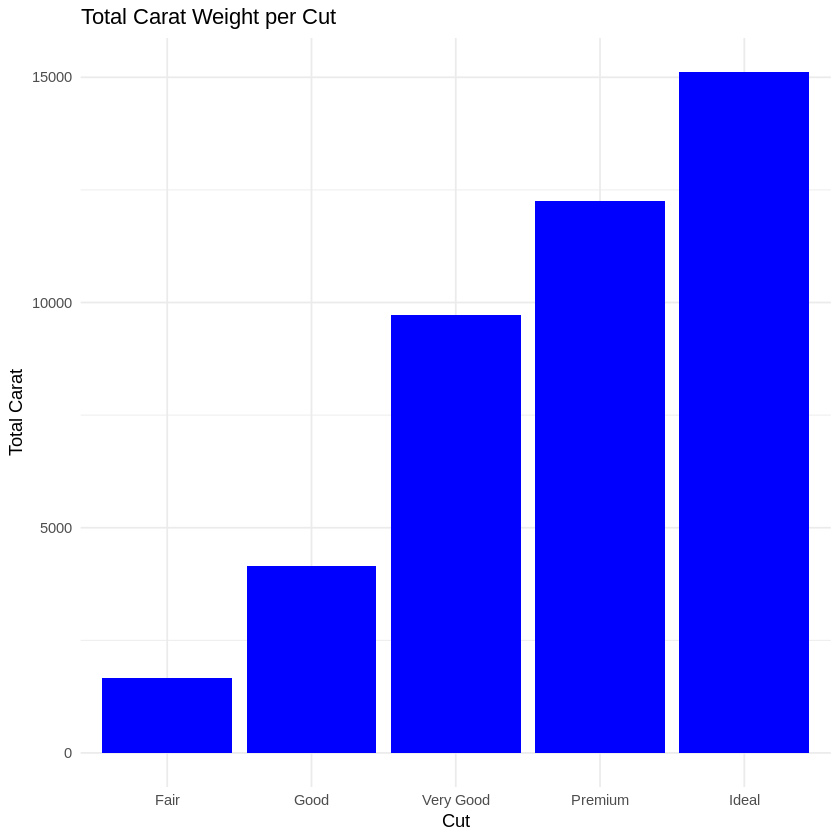

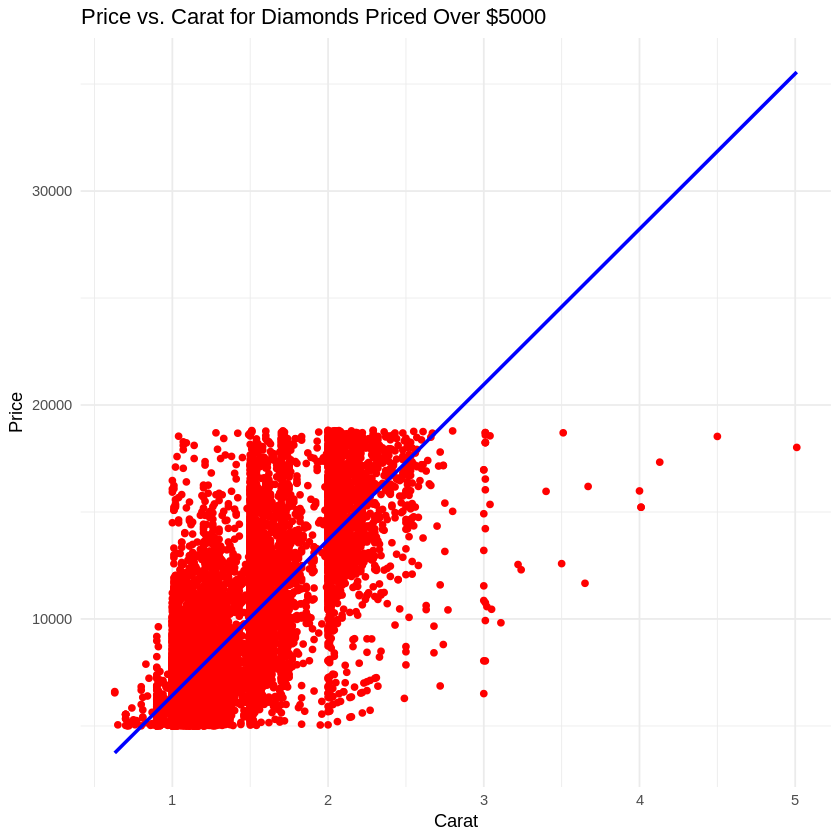

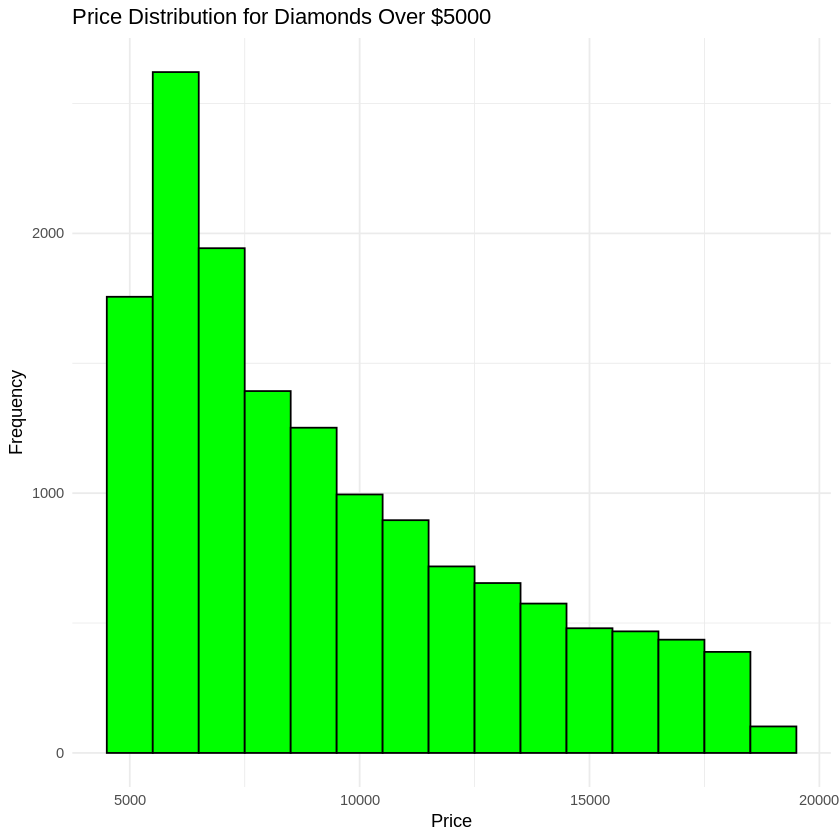

In [7]:

# Bar plot: Total carat weight per cut
ggplot(diamonds_summary, aes(x = cut, y = total_carat)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(title = "Total Carat Weight per Cut",
       x = "Cut",
       y = "Total Carat") +
  theme_minimal()

# Scatter plot: Price vs. Carat for diamonds priced over $5000
ggplot(diamonds_filtered, aes(x = carat, y = price)) +
  geom_point(color = "red") +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Price vs. Carat for Diamonds Priced Over $5000",
       x = "Carat",
       y = "Price") +
  theme_minimal()

# Histogram: Distribution of diamond prices
ggplot(diamonds_filtered, aes(x = price)) +
  geom_histogram(binwidth = 1000, fill = "green", color = "black") +
  labs(title = "Price Distribution for Diamonds Over $5000",
       x = "Price",
       y = "Frequency") +
  theme_minimal()


# 4. Export the Cleaned and Processed Data


In [8]:

# Save the cleaned dataset to a CSV file
write_csv(diamonds_clean, "cleaned_diamonds.csv")

# Save a summary of the analysis results
write_csv(diamonds_summary, "summary_price_by_cut.csv")
